# cadCAD Experiment


In [68]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments

# from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline





The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 63 ms (started: 2021-07-26 13:11:14 -04:00)


In [69]:
from model import run

time: 63 ms (started: 2021-07-26 13:11:14 -04:00)


In [70]:
df = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 21, 1, 10)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.38s
time: 453 ms (started: 2021-07-26 13:11:14 -04:00)


In [71]:
df

,pool_delegated_stake,pool_locked_stake,shares,delegators,period_revenue,GRT,indexing_revenue,query_revenue,indexer_revenue,epoch,simulation,subset,run,substep,timestep
7,0.00,0,5.56,{0: <model.parts.delegator.Delegator object at...,118.70,10023013.67,115.07,3.63,29.13,0,0,0,1,7,1
14,0.00,0,6.41,{0: <model.parts.delegator.Delegator object at...,5.25,10023013.65,0.00,5.25,29.66,0,0,0,1,7,2
21,0.00,0,3.80,{0: <model.parts.delegator.Delegator object at...,14.76,10023013.62,0.00,14.76,31.13,0,0,0,1,7,3
28,0.00,0,1.20,{0: <model.parts.delegator.Delegator object at...,8.76,10023013.60,0.00,8.76,32.01,0,0,0,1,7,4
35,5.00,0,3.81,{0: <model.parts.delegator.Delegator object at...,2.55,10023013.57,0.00,2.55,32.26,0,0,0,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,840.88,0,37.31,{0: <model.parts.delegator.Delegator object at...,17.44,10092370.90,0.00,17.44,170.49,0,0,0,1,7,86
609,847.29,0,37.59,{0: <model.parts.delegator.Delegator object at...,11.15,10092370.88,0.00,11.15,171.61,0,0,0,1,7,87
616,858.52,0,38.08,{0: <model.parts.delegator.Delegator object at...,7.21,10092370.85,0.00,7.21,172.33,0,0,0,1,7,88
623,867.74,0,38.48,{0: <model.parts.delegator.Delegator object at...,16.93,10092370.83,0.00,16.93,174.02,0,0,0,1,7,89


time: 78 ms (started: 2021-07-26 13:11:14 -04:00)


# Revenue coming in each period.  
## Mean is a parameter, currently 7
## It's exponentially distributed.

<AxesSubplot:>

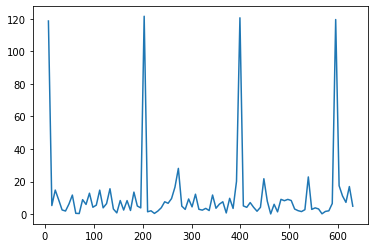

time: 172 ms (started: 2021-07-26 13:11:14 -04:00)


In [72]:
df.period_revenue.plot()

<AxesSubplot:>

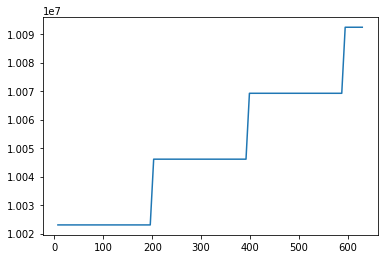

time: 156 ms (started: 2021-07-26 13:11:15 -04:00)


In [73]:
df.GRT.plot()

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each delegator eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [74]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_holdings:
            delegator_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_holdings[delegator_id][timestep] = delegator.holdings
        delegator_shares[delegator_id][timestep] = delegator.shares
        
    timestep += 1

time: 47 ms (started: 2021-07-26 13:11:15 -04:00)


# Shares broken down by Delegator

In [75]:
delegator_shares

{0: {0: 5.555428065944428,
  1: 6.4053783161085995,
  2: 3.804375223805449,
  3: 1.2045161856263311,
  4: 3.812736148657238,
  5: 1.6457641381654362,
  6: 2.4215962060603107,
  7: 3.0085428214764764,
  8: 3.9789030835473027,
  9: 4.9534756886304905,
  10: 0.7297624933010063,
  11: 1.0356003342717477,
  12: 1.0397649277849268,
  13: 1.0416552955222953,
  14: 1.0442477163633685,
  15: 1.0507821673247149,
  16: 1.367463833661522,
  17: 1.3707544758555248,
  18: 1.6427857070252065,
  19: 1.6444551163940722,
  20: 1.9607668938984637,
  21: 2.2567889034937467,
  22: 2.257865589436492,
  23: 2.2612940022048096,
  24: 2.2955484491016724,
  25: 2.3007850005571315,
  26: 2.3028069429334987,
  27: 2.3504703571591983,
  28: 2.375888119615656,
  29: 2.376582738097033,
  30: 2.3775770317378457,
  31: 2.377781968817582,
  32: 2.385925053584368,
  33: 2.387696460643386,
  34: 2.4690455407908436,
  35: 2.760154724446958,
  36: 2.764085643411435,
  37: 2.7703536840774876,
  38: 2.780740591267955,
  39: 

time: 172 ms (started: 2021-07-26 13:11:15 -04:00)


In [76]:
# resultset = [value for key, value in your_dict.items() if key not in your_blacklisted_set]

time: 63 ms (started: 2021-07-26 13:11:15 -04:00)


Text(0, 0.5, 'Delegator Shares')

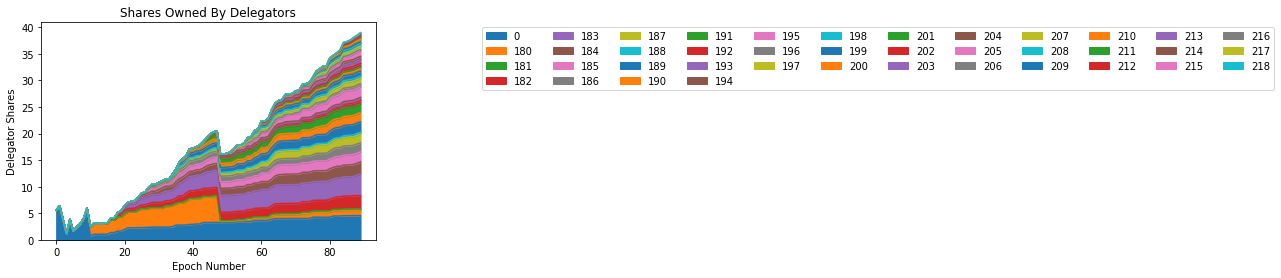

time: 594 ms (started: 2021-07-26 13:11:15 -04:00)


In [77]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

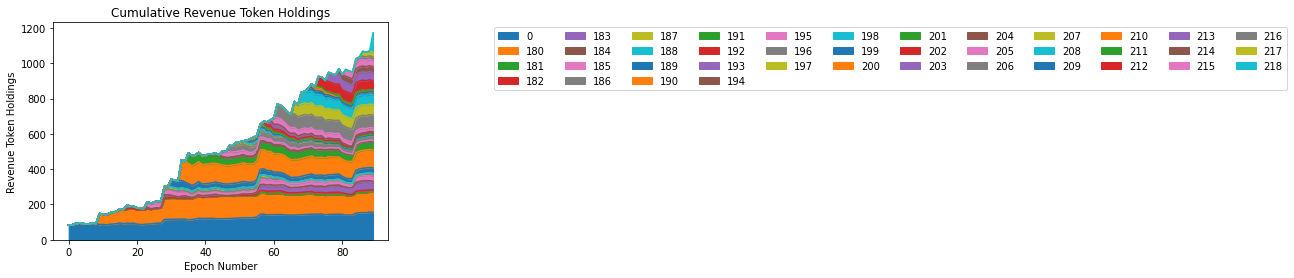

time: 656 ms (started: 2021-07-26 13:11:16 -04:00)


In [78]:
df_plot = pd.DataFrame(delegator_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [79]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 63 ms (started: 2021-07-26 13:11:17 -04:00)


In [80]:
df['total_shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 62 ms (started: 2021-07-26 13:11:17 -04:00)


In [81]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.total_shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 125 ms (started: 2021-07-26 13:11:17 -04:00)


In [82]:
shareholder_df

,shareholder,shares,Epoch Number
0,0,5.56,0
0,0,6.41,1
0,0,3.80,2
0,0,1.20,3
0,0,3.81,4
...,...,...,...
35,214,0.06,89
36,215,0.08,89
37,216,0.06,89
38,217,0.02,89


time: 62 ms (started: 2021-07-26 13:11:18 -04:00)


# Price per share

In [83]:
df.pool_delegated_stake

7       0.00
14      0.00
21      0.00
28      0.00
35      5.00
       ...  
602   840.88
609   847.29
616   858.52
623   867.74
630   878.94
Name: pool_delegated_stake, Length: 90, dtype: float64

time: 47 ms (started: 2021-07-26 13:11:18 -04:00)


In [84]:
df['period_revenue_per_share'] = df.period_revenue/df.shares

time: 62 ms (started: 2021-07-26 13:11:18 -04:00)


# Revenue per share 

<AxesSubplot:>

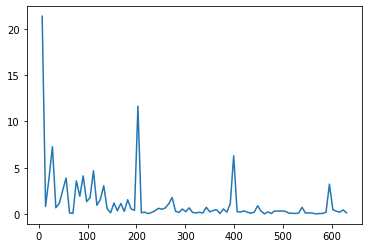

time: 172 ms (started: 2021-07-26 13:11:18 -04:00)


In [85]:
df.period_revenue_per_share.plot()

In [86]:
df.columns

Index(['pool_delegated_stake', 'pool_locked_stake', 'shares', 'delegators',
       'period_revenue', 'GRT', 'indexing_revenue', 'query_revenue',
       'indexer_revenue', 'epoch', 'simulation', 'subset', 'run', 'substep',
       'timestep', 'shareholders', 'total_shares', 'period_revenue_per_share'],
      dtype='object')

time: 78 ms (started: 2021-07-26 13:11:18 -04:00)
